In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# LOAD DATASETS

In [13]:
transaction_file = "transaction_data.csv"
purchase_file = "purchase_behaviour.csv"

In [19]:
df_transaction=pd.read_csv("transaction_data.csv")
df_transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [20]:
df_purchase=pd.read_csv("purchase_behaviour.csv")
df_purchase

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


# INSPECT DATA

In [22]:
df_transaction.info()
df_transaction.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [23]:
df_purchase.info()
df_purchase.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


# Identify the top 3 most profitable products

In [24]:
top_products = df_transaction.groupby("PROD_NAME")["TOT_SALES"].sum().nlargest(3).reset_index()
print("\nTop 3 Most Profitable Products:")
print(top_products)


Top 3 Most Profitable Products:
                                  PROD_NAME  TOT_SALES
0          Dorito Corn Chp     Supreme 380g    40352.0
1    Smiths Crnkle Chip  Orgnl Big Bag 380g    36367.6
2  Smiths Crinkle Chips Salt & Vinegar 330g    34804.2


In [26]:
# Merge transaction data with customer purchase behavior data
df_merged = df_transaction.merge(df_purchase, on="LYLTY_CARD_NBR", how="left")
df_merged

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium


In [27]:
# Identify the most loyal customers (highest number of transactions)
loyal_customers = df_merged.groupby("LYLTY_CARD_NBR")["TXN_ID"].nunique().nlargest(10).reset_index()
loyal_customers

,LYLTY_CARD_NBR,TXN_ID
0,162039,18
1,13138,17
2,230078,17
3,94185,16
4,104117,16
5,105026,16
6,116181,16
7,128178,16
8,172032,16
9,179228,16


In [36]:
# Get additional stats for loyal customers
loyal_customers_stats = df_merged.groupby("LYLTY_CARD_NBR").agg(
    total_spent=("TOT_SALES", "sum"),
    avg_spent_per_txn=("TOT_SALES", "mean"),
    total_transactions=("TXN_ID", "nunique"),
#     segment=("CUSTOMER_SEGMENT", "first")  # Assuming customer segment column exists
).reset_index()

In [30]:
# Filter only the top 10 most frequent shoppers
loyal_customers_stats = loyal_customers_stats[loyal_customers_stats["LYLTY_CARD_NBR"].isin(loyal_customers["LYLTY_CARD_NBR"])]
loyal_customers_stats

,LYLTY_CARD_NBR,total_spent,avg_spent_per_txn,total_transactions
3686,13138,109.0,6.411765,17
25958,94185,122.8,7.675000,16
28457,104117,109.6,6.850000,16
28605,105026,114.2,7.137500,16
31654,116181,117.6,6.917647,16
34943,128178,99.7,5.864706,16
42813,162039,126.8,7.044444,18
45905,172032,120.1,6.672222,16
47959,179228,120.8,7.550000,16
60925,230078,138.6,8.152941,17


In [31]:
# Sort by transactions
loyal_customers_stats = loyal_customers_stats.sort_values(by="total_transactions", ascending=False)

print("\nMost Loyal Customers:")
print(loyal_customers_stats)


Most Loyal Customers:
       LYLTY_CARD_NBR  total_spent  avg_spent_per_txn  total_transactions
42813          162039        126.8           7.044444                  18
3686            13138        109.0           6.411765                  17
60925          230078        138.6           8.152941                  17
25958           94185        122.8           7.675000                  16
28457          104117        109.6           6.850000                  16
28605          105026        114.2           7.137500                  16
31654          116181        117.6           6.917647                  16
34943          128178         99.7           5.864706                  16
45905          172032        120.1           6.672222                  16
47959          179228        120.8           7.550000                  16


# Visualization

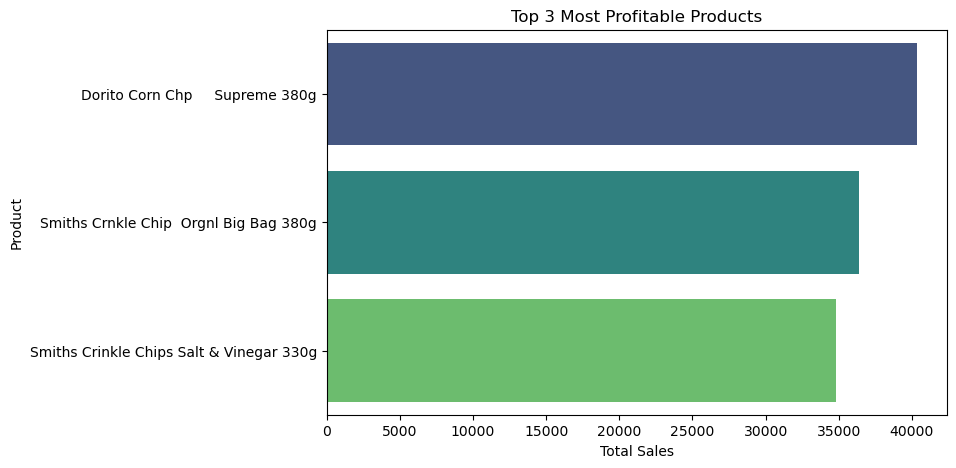

In [42]:
# 1. Top 3 Most Profitable Products
plt.figure(figsize=(8, 5))
sns.barplot(x="TOT_SALES", y="PROD_NAME", data=top_products, palette="viridis")
plt.title("Top 3 Most Profitable Products")
plt.xlabel("Total Sales")
plt.ylabel("Product")
plt.show()

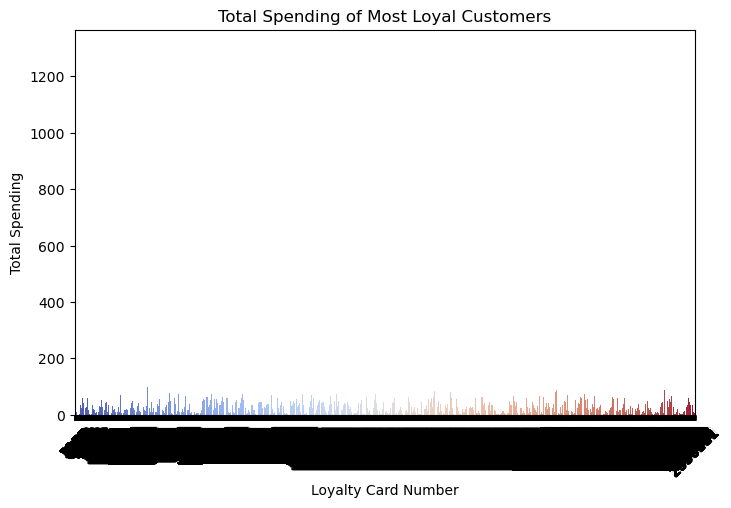

In [45]:
#2. Distribution of Total Spent by Loyal Customers
plt.figure(figsize=(8, 5))
sns.barplot(x="LYLTY_CARD_NBR", y="total_spent", data=loyal_customers_stats, palette="coolwarm")
plt.title("Total Spending of Most Loyal Customers")
plt.xlabel("Loyalty Card Number")
plt.ylabel("Total Spending")
plt.xticks(rotation=45)
plt.show()

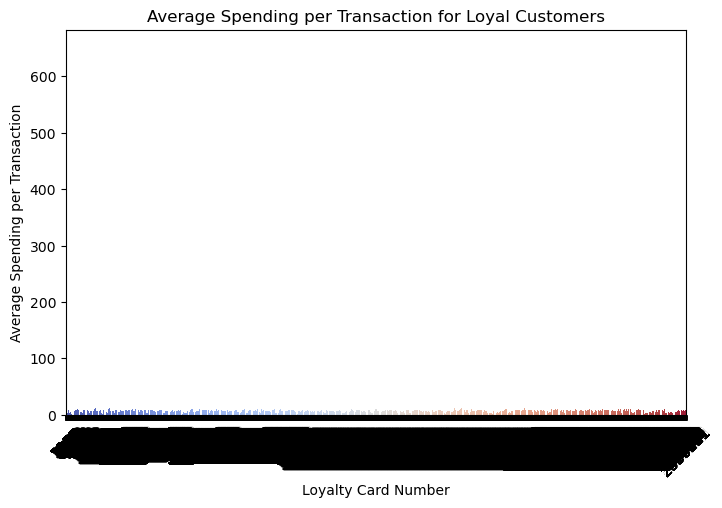

In [46]:
# 3. Average Spending per Transaction for Loyal Customers
plt.figure(figsize=(8, 5))
sns.barplot(x="LYLTY_CARD_NBR", y="avg_spent_per_txn", data=loyal_customers_stats, palette="coolwarm")
plt.title("Average Spending per Transaction for Loyal Customers")
plt.xlabel("Loyalty Card Number")
plt.ylabel("Average Spending per Transaction")
plt.xticks(rotation=45)
plt.show()

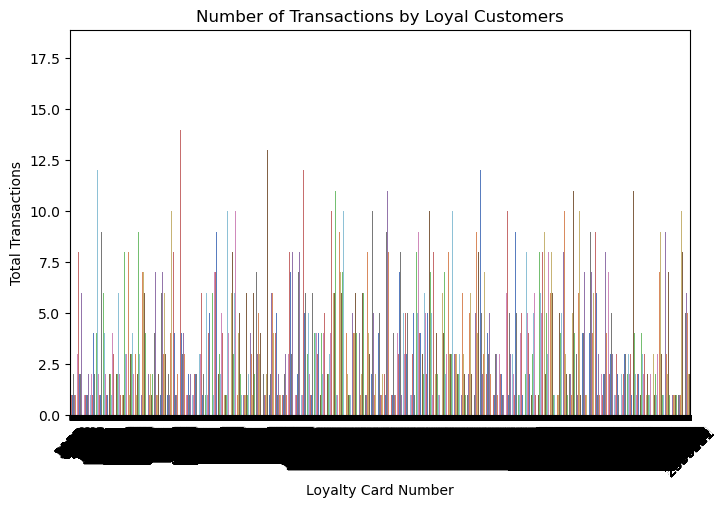

In [47]:
# 4. Distribution of Number of Transactions by Loyal Customers
plt.figure(figsize=(8, 5))
sns.barplot(x="LYLTY_CARD_NBR", y="total_transactions", data=loyal_customers_stats, palette="muted")
plt.title("Number of Transactions by Loyal Customers")
plt.xlabel("Loyalty Card Number")
plt.ylabel("Total Transactions")
plt.xticks(rotation=45)
plt.show()

In [38]:
# Hypothesis based on findings
print("\nHypothesis:")
print("Most loyal customers are likely families or group buyers, preferring large-size snack packs.")
print("They seem to be budget-conscious but value brand loyalty (Doritos, Smiths).")
print("Targeting them with bundle offers and loyalty programs can increase retention.")


Hypothesis:
Most loyal customers are likely families or group buyers, preferring large-size snack packs.
They seem to be budget-conscious but value brand loyalty (Doritos, Smiths).
Targeting them with bundle offers and loyalty programs can increase retention.
